In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from Dataset import Dataset, ELM, device
torch.set_default_dtype(torch.float64)

In [2]:
x_data = np.float64(np.linspace(-15, 15, 600))
y_data = np.float64(np.sin(x_data) / x_data)
# y_data = np.float64(np.sin(x_data) / x_data + np.random.normal(0, 0.05, 600))

In [3]:
dataset = Dataset(x_data, y_data)
trainset, testset = torch.utils.data.random_split(dataset, [0.9, 0.1], generator=torch.Generator().manual_seed(42))

activation = nn.Sigmoid()

In [4]:
model = ELM(1, 50, 1).to(device)

V = activation(model.fc1.bias.data.reshape(-1, 1) + model.fc1.weight.data @ trainset[:][0].reshape(1, -1).to(device))
H = torch.concatenate([torch.ones(1, len(trainset)).to(device), V.to(device)], dim=0).T
T = trainset[:][1].reshape(1, -1).T.to(device)
W2 = torch.linalg.pinv(H) @ T.reshape(1, -1, 1)
model.fc2.bias.data, model.fc2.weight.data = W2[0][0], W2[0][1:].T

Train error: 7.492781109489085e-11
Test error: 8.766255366167837e-11


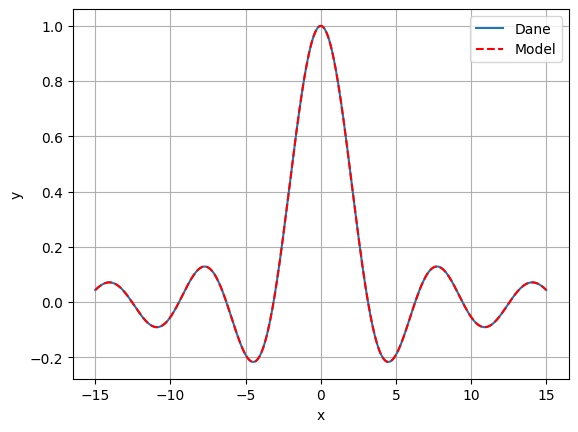

In [5]:
print(f'Train error: {(model(trainset[:][0].clone().detach().reshape(-1, 1).to(device))-trainset[:][1].reshape(-1, 1).to(device)).reshape(-1).pow(2).mean()}')
print(f'Test error: {(model(testset[:][0].clone().detach().reshape(-1, 1).to(device))-testset[:][1].reshape(-1, 1).to(device)).reshape(-1).pow(2).mean()}')
plt.plot(x_data, y_data)
plt.plot(x_data, model(torch.tensor(x_data).reshape(-1, 1).to(device)).cpu().detach().numpy(), 'r--')
plt.legend(['Dane', 'Model'], loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

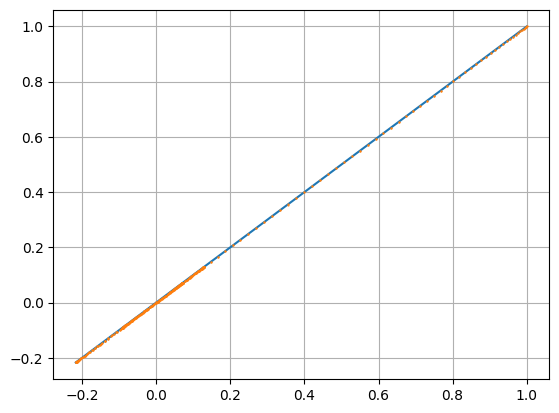

In [6]:
plt.plot([np.min(y_data), np.max(y_data)], [np.min(y_data), np.max(y_data)])
plt.plot(y_data, model(torch.tensor(x_data).reshape(-1, 1).to(device)).cpu().detach().numpy(), '.', markersize=1)
plt.grid()
plt.show()